In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('medications.csv', parse_dates=['STOP'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,792fae81-a007-44b0-8221-46953737b089,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,11.91,0.0,1,11.91,444814009.0,Viral sinusitis (disorder)
1,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,4e595f0c-f50f-461b-a04e-13b4e492350e,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,29.89,0.0,1,29.89,444814009.0,Viral sinusitis (disorder)
2,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,6e2f1a2d-27bd-3701-8d08-dae202c58632,3b639086-5fbc-4720-8c31-e8c8c0f1d660,313782,Acetaminophen 325 MG Oral Tablet,6.41,0.0,1,6.41,10509002.0,Acute bronchitis (disorder)
3,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,d47b3510-2895-3b70-9897-342d681c769d,e1ab4933-07a1-49f0-b4bd-05500919061d,313782,Acetaminophen 325 MG Oral Tablet,8.14,0.0,1,8.14,10509002.0,Acute bronchitis (disorder)
4,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,...,d47b3510-2895-3b70-9897-342d681c769d,4ec8d55b-05fc-42a5-bfa3-1e233874a362,849574,Naproxen sodium 220 MG Oral Tablet,5.73,0.0,1,5.73,NaN,NaN


In [3]:
dt_stop = df_al['STOP'].dropna()
dt_stop = dt_stop.unique()
dt_stop

<DatetimeArray>
['2011-12-22 15:02:18+00:00', '2019-04-10 15:02:18+00:00',
 '2017-01-05 17:45:28+00:00', '2011-05-27 12:58:08+00:00',
 '2017-02-12 12:58:08+00:00', '2019-05-07 12:58:08+00:00',
 '2011-04-30 00:26:23+00:00', '2012-04-24 00:26:23+00:00',
 '2013-04-19 00:26:23+00:00', '2015-04-18 00:26:23+00:00',
 ...
 '2000-11-18 17:27:52+00:00', '2001-11-24 17:27:52+00:00',
 '2002-11-30 17:27:52+00:00', '2002-04-29 17:27:52+00:00',
 '2003-12-06 17:27:52+00:00', '2004-12-11 17:27:52+00:00',
 '2005-12-17 17:27:52+00:00', '2005-12-31 17:27:52+00:00',
 '1983-09-29 17:27:52+00:00', '1984-11-22 17:27:52+00:00']
Length: 24778, dtype: datetime64[ns, UTC]

In [4]:
df_al['STOP'] = df_al['STOP'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['STOP'] = df_al['STOP'].replace({pd.NaT: "0"})
df_al['STOP']

0        1
1        1
2        1
3        1
4        1
        ..
42984    1
42985    1
42986    0
42987    0
42988    0
Name: STOP, Length: 42989, dtype: object

In [5]:
contigency = pd.crosstab(df_al['STOP'], df_al['REASONDESCRIPTION'])
contigency

REASONDESCRIPTION,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Alzheimer's disease (disorder),Anemia (disorder),Atopic dermatitis,Child attention deficit disorder,Childhood asthma,Chronic congestive heart failure (disorder),Chronic obstructive bronchitis (disorder),...,Posttraumatic stress disorder,Primary fibromyalgia syndrome,Primary small cell malignant neoplasm of lung TNM stage 1 (disorder),Pulmonary emphysema (disorder),Pyelonephritis,Rheumatoid arthritis,Secondary malignant neoplasm of colon,Sinusitis (disorder),Streptococcal sore throat (disorder),Viral sinusitis (disorder)
STOP,,,,,,,,,,,,,,,,,,,,,
1,12,565,9,16,3388,8,6,4032,0,167,...,0,1,62,311,2,4,0,12,136,245
0,0,1,0,21,0,0,2,112,165,9,...,5,2,0,18,0,0,8,0,1,2


<AxesSubplot:xlabel='REASONDESCRIPTION', ylabel='STOP'>

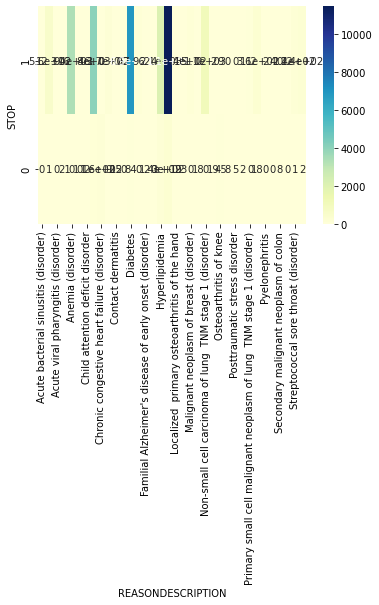

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.0